In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm,skew

In [2]:
data=pd.read_csv("C://Users//Ambarish Deb//Downloads//Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Assumptions from the dataset
1. Candidates being screened all have/are purusing an MBA
2. Placement status is being taken as a sign of employability

### Data Cleaning and EDA

In [3]:
data.shape

(215, 15)

In [4]:
#dropping unneeded columns
del data['salary']#unneeded
del data['sl_no']#unneeded

Checking for null values

In [5]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

Checking for wrong datatypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


Checking for repeating/redundant values

In [7]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [8]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [9]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [10]:
data['hsc_s'].unique()


array(['Commerce', 'Science', 'Arts'], dtype=object)

In [11]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [12]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

Checking the distribution of numerical variables and outliers, if any.

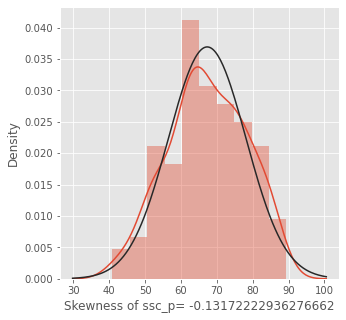

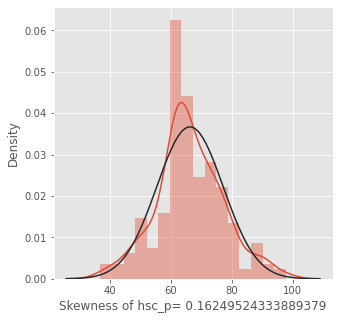

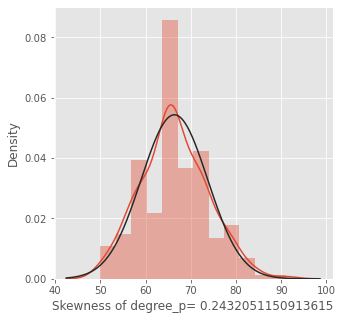

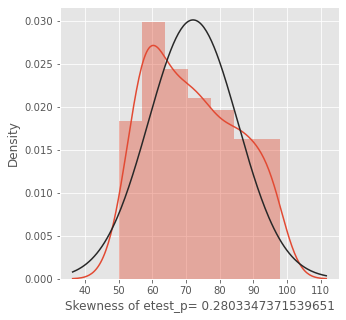

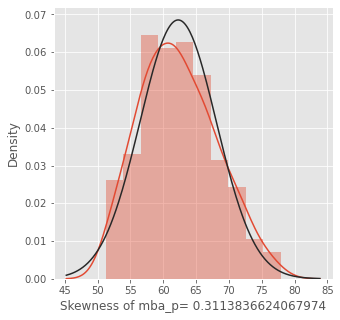

In [13]:
plt.style.use('ggplot')
for x in data.select_dtypes(include='float64').columns:
    plt.figure(figsize = (5,5))
    skewness = skew(data[x])
    sns.distplot(data[x],fit=norm)
    plt.xlabel("Skewness of "+str(x)+"= "+str(skewness))
    plt.show()

skewness lies between -0.5 and 0.5, no need to rectify as such

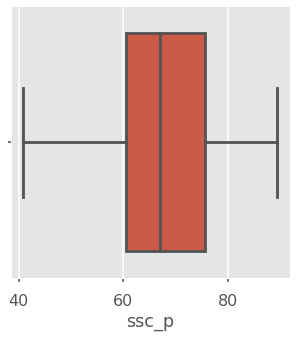

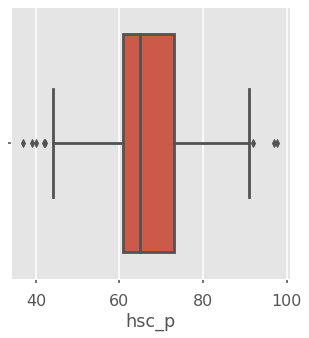

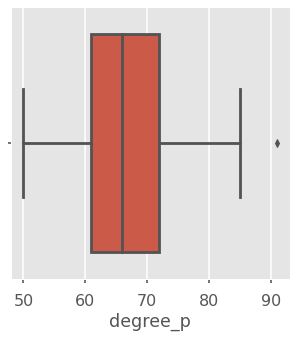

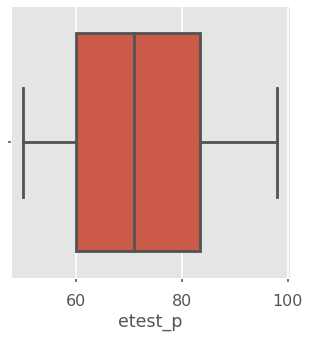

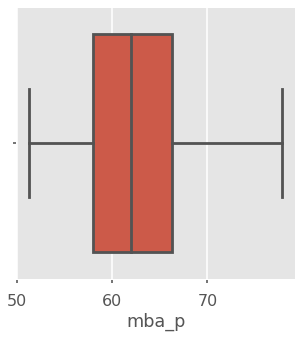

In [14]:
plt.style.use('seaborn-poster')
for x in data.select_dtypes(include='float64').columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(data[x])
    plt.show()

since outlying values in this case aren't atypical or improbable, we need not remove them

In [15]:
data['employable']=data['status'].apply(lambda x: 1 if x== 'Placed' else 0)
data['employable'].value_counts()

1    148
0     67
Name: employable, dtype: int64

Distribution of categorical variables

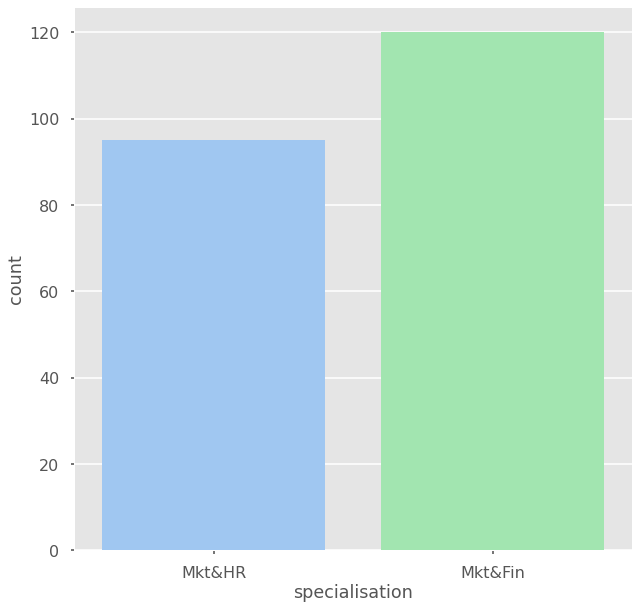

In [16]:
plt.figure(figsize = (10, 10))
plt.style.use('seaborn-pastel')

sns.countplot(x="specialisation", data=data)
plt.show()

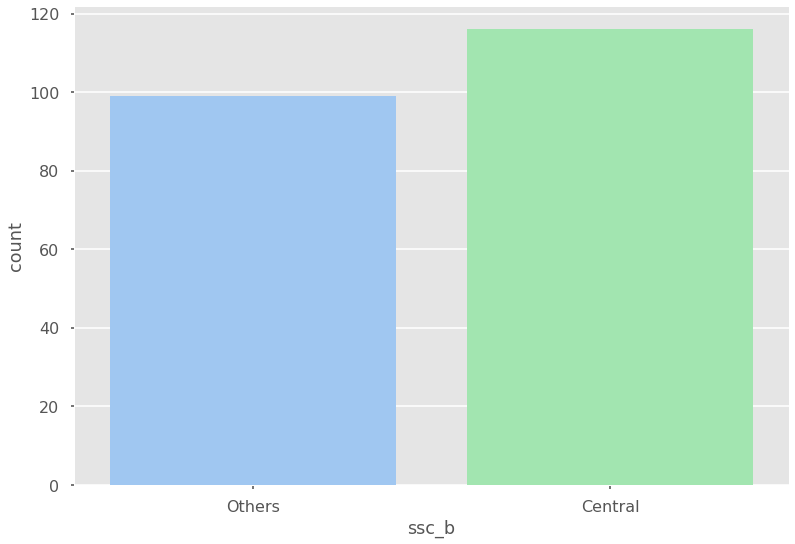

In [17]:
sns.countplot(x="ssc_b",data=data)
plt.show()

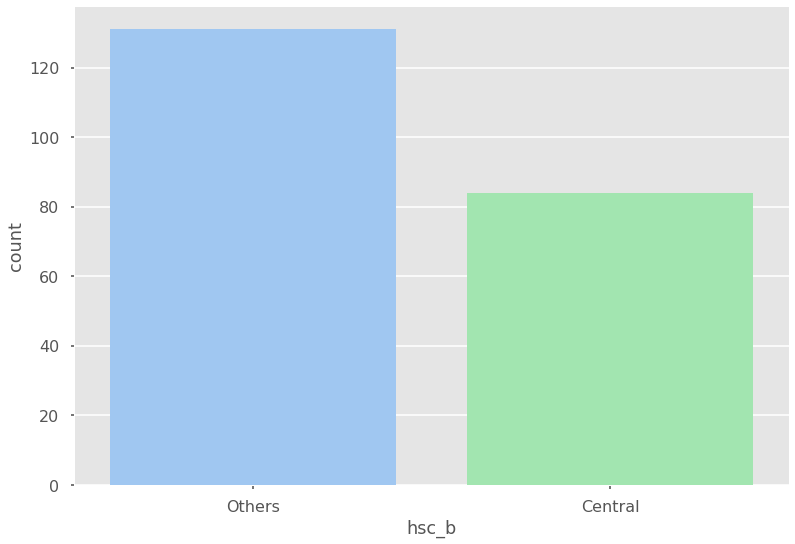

In [18]:
sns.countplot(x="hsc_b",data=data)
plt.show()

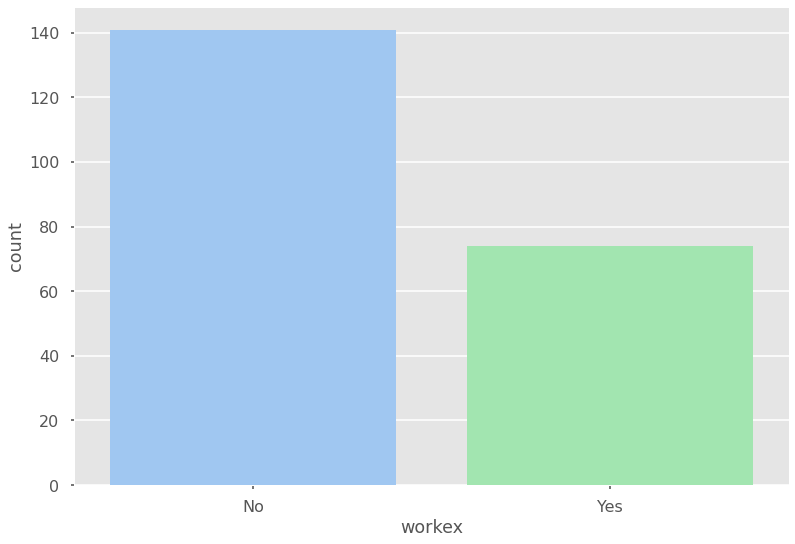

In [19]:
sns.countplot(x="workex", data=data)
plt.show()

most people appearing in the hiring process did not have prior work experience

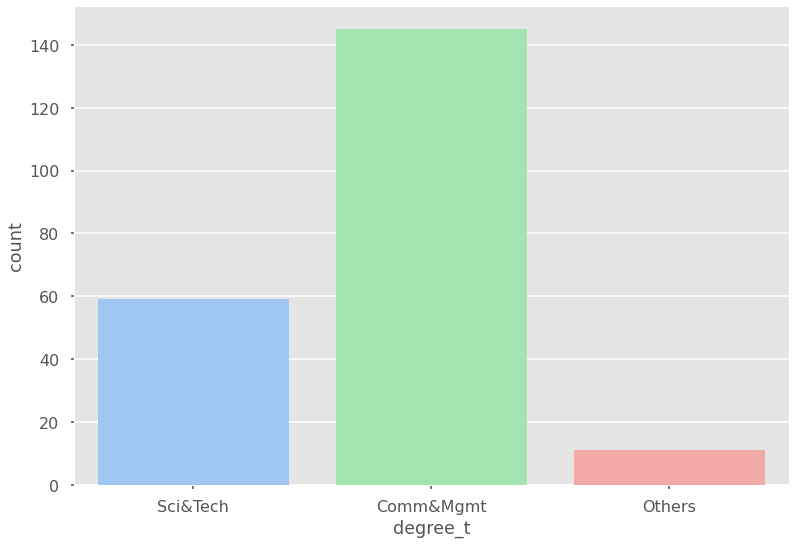

In [20]:
sns.countplot(x="degree_t", data=data)
plt.show()

a majority of people have a degree in commerce, followed by Science and Tech

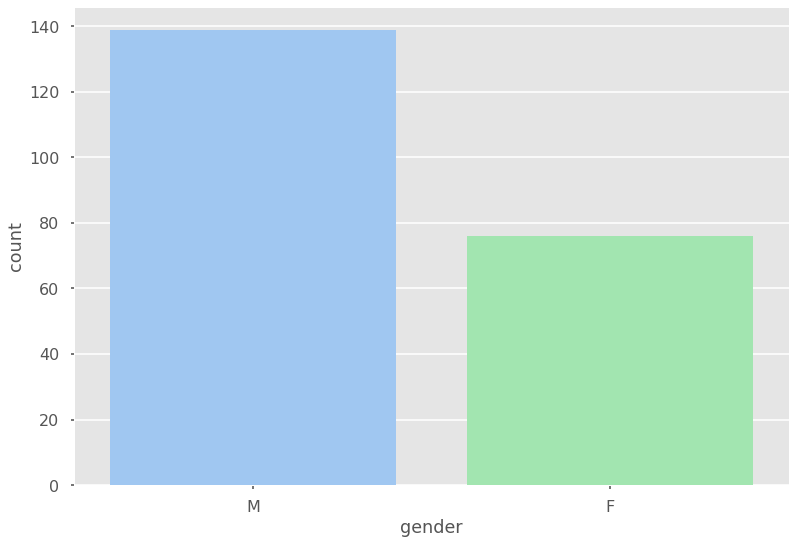

In [21]:
sns.countplot(x="gender", data=data)
plt.show()

A majority of the job applicants are male

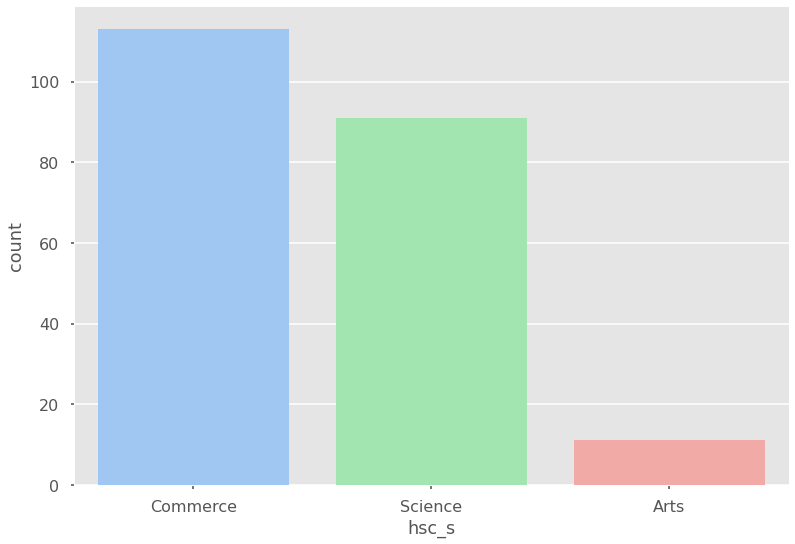

In [22]:
sns.countplot(x="hsc_s", data=data)
plt.show()

Major component of people have either a science background or a commerce background

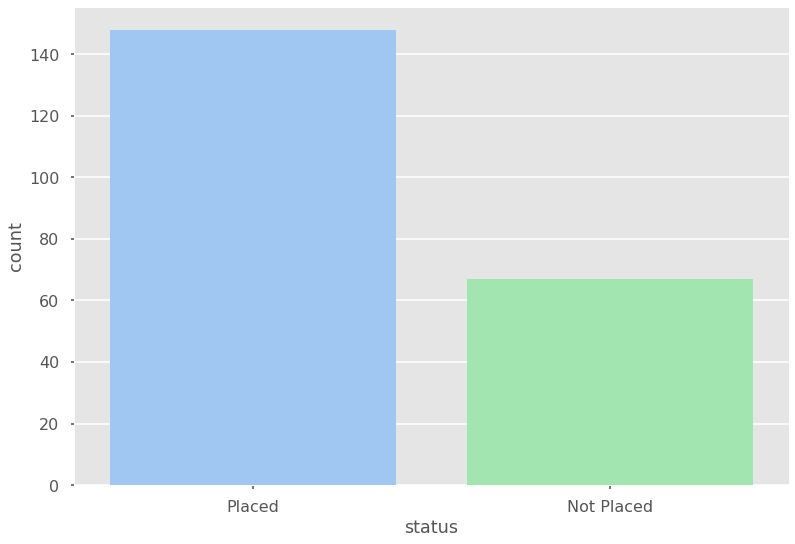

In [23]:
sns.countplot(x="status", data=data)
plt.show()

The data seems to be slightly unbalanced as the placed candidated are more than the unplaced candidates

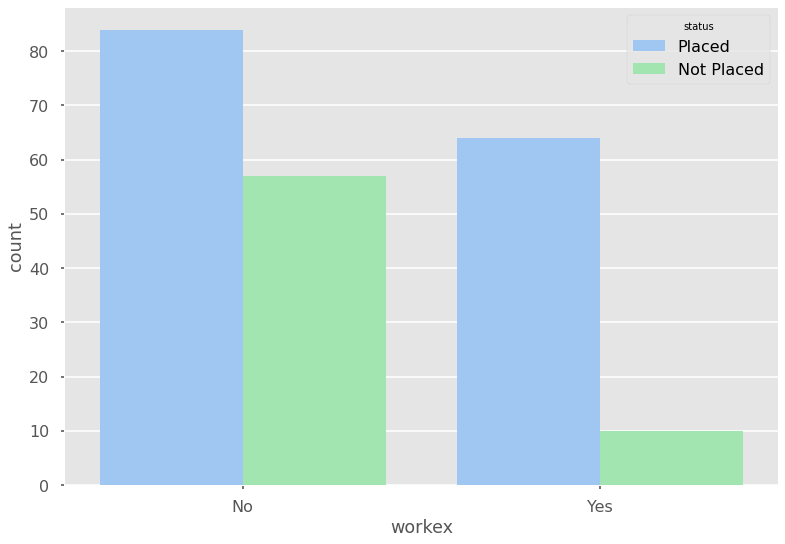

In [24]:
sns.countplot(x = 'workex',hue = "status",data = data)
plt.show()

people with work experience are more likely to land a job than freshers

In [25]:
data['employable']

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: employable, Length: 215, dtype: int64

### Correlation between target and features
Performing chi squared test to measure correlation between categorical variables.

H0:The variables are not correlated with each other.

H1: Variables are correlated with each other

If P-Value>0.05 then we accept H0

else, we accept H1.

In [26]:
from scipy.stats import chi2_contingency,pointbiserialr
chisqresults={}
for x in data.select_dtypes(include='object').columns[:-1]:
    CrosstabResult=pd.crosstab(index=data[x],columns=data['status'])
    ChiSqResult = chi2_contingency(CrosstabResult)
    chisqresults[x]=ChiSqResult[1]
    

chisqresults

{'gender': 0.23980260881037566,
 'ssc_b': 0.6897729431530739,
 'hsc_b': 0.9222837052885,
 'hsc_s': 0.5727118511343621,
 'degree_t': 0.22661076190356658,
 'workex': 9.906584720516494e-05,
 'specialisation': 0.00042018425858864284}

among categorical variables, 'workex' and 'specialisation' are correlated with the outcome.

<AxesSubplot:>

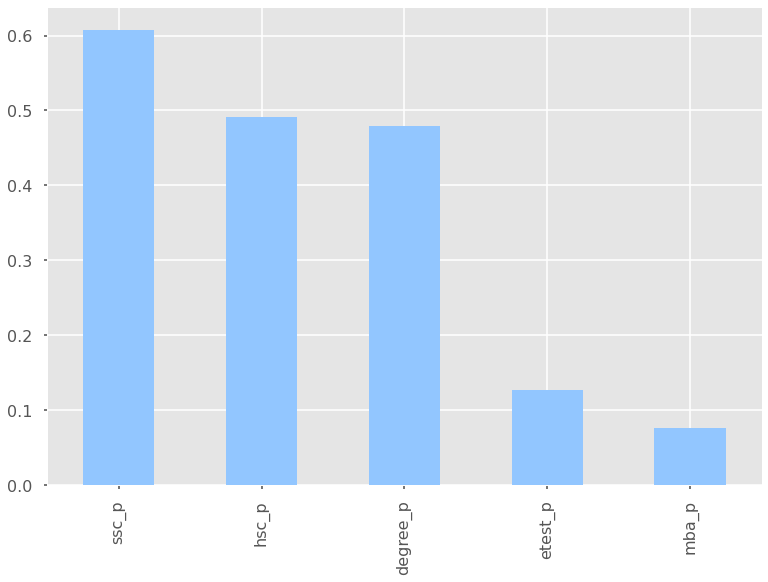

In [27]:
data.select_dtypes(exclude='object').corr()['employable'][:-1].plot(kind='bar')

among numercial variables, ssc scores are highly correlated while hsc and graduation scores are moderately correlated with the target variable

### Preprocessing

In [28]:
Y=data['employable']
del data['employable']
del data['status']

In [29]:
final_dataset=pd.get_dummies(data,drop_first=True)
final_dataset.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0


In [30]:
final_dataset.to_csv("finaldata.csv")

In [31]:
final_dataset.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,-0.068969,0.116194,0.066996,-0.101323,0.189847,-0.066127,0.221235,0.175675,-0.172536
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,-0.021334,-0.137013,-0.019548,0.258093,-0.226675,-0.131382,-0.053599,0.141025,-0.241630
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.173217,0.038070,0.067229,-0.022724,0.092006,-0.180408,0.123477,0.122648,-0.218286
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.084294,-0.018991,0.039108,-0.021732,0.055352,0.006907,0.009748,0.056735,-0.236315
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,-0.300531,0.083120,0.090201,-0.049415,0.048050,-0.036055,0.125009,0.168811,-0.105728
gender_M,-0.068969,-0.021334,-0.173217,0.084294,-0.300531,1.000000,0.019429,0.065945,-0.001087,0.042682,-0.093246,0.084072,0.085153,-0.106160
ssc_b_Others,0.116194,-0.137013,0.038070,-0.018991,0.083120,0.019429,1.000000,0.605883,-0.056671,0.058505,-0.002758,0.101060,-0.040744,-0.051565
hsc_b_Others,0.066996,-0.019548,0.067229,0.039108,0.090201,0.065945,0.605883,1.000000,-0.073522,0.126446,-0.116920,0.086548,0.038357,0.002232
hsc_s_Commerce,-0.101323,0.258093,-0.022724,-0.021732,-0.049415,-0.001087,-0.056671,-0.073522,1.000000,-0.901673,-0.202135,-0.584673,-0.056719,-0.129985
hsc_s_Science,0.189847,-0.226675,0.092006,0.055352,0.048050,0.042682,0.058505,0.126446,-0.901673,1.000000,0.057432,0.654593,0.033270,0.166639


We have assumed that all the students have an MBA.
Yet to be safe,two models will be created- for students who did an MBA and who did not.

In [32]:
final_dataset.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')

In [33]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ssc_p                  215 non-null    float64
 1   hsc_p                  215 non-null    float64
 2   degree_p               215 non-null    float64
 3   etest_p                215 non-null    float64
 4   mba_p                  215 non-null    float64
 5   gender_M               215 non-null    uint8  
 6   ssc_b_Others           215 non-null    uint8  
 7   hsc_b_Others           215 non-null    uint8  
 8   hsc_s_Commerce         215 non-null    uint8  
 9   hsc_s_Science          215 non-null    uint8  
 10  degree_t_Others        215 non-null    uint8  
 11  degree_t_Sci&Tech      215 non-null    uint8  
 12  workex_Yes             215 non-null    uint8  
 13  specialisation_Mkt&HR  215 non-null    uint8  
dtypes: float64(5), uint8(9)
memory usage: 10.4 KB


In [34]:
X_no_mba=final_dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 
       'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes']]
X_no_mba['degree_t_SciAndTech']=X_no_mba['degree_t_Sci&Tech']
del X_no_mba['degree_t_Sci&Tech']
X_no_mba.head()

,ssc_p,hsc_p,degree_p,etest_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,workex_Yes,degree_t_SciAndTech
0,67.00,91.00,58.00,55.0,1,1,1,1,0,0,0,1
1,79.33,78.33,77.48,86.5,1,0,1,0,1,0,1,1
2,65.00,68.00,64.00,75.0,1,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,1,0,0,0,1,0,0,1
4,85.80,73.60,73.30,96.8,1,0,0,1,0,0,0,0


In [35]:
X_mba=final_dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
       'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes','mba_p','specialisation_Mkt&HR']]
X_mba['specialisation_MktAndHR']=X_mba['specialisation_Mkt&HR']
X_mba['degree_t_SciAndTech']=X_mba['degree_t_Sci&Tech']
del X_mba['degree_t_Sci&Tech']
X_mba.head()

,ssc_p,hsc_p,degree_p,etest_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,workex_Yes,mba_p,specialisation_Mkt&HR,specialisation_MktAndHR,degree_t_SciAndTech
0,67.00,91.00,58.00,55.0,1,1,1,1,0,0,0,58.80,1,1,1
1,79.33,78.33,77.48,86.5,1,0,1,0,1,0,1,66.28,0,0,1
2,65.00,68.00,64.00,75.0,1,0,0,0,0,0,0,57.80,0,0,0
3,56.00,52.00,52.00,66.0,1,0,0,0,1,0,0,59.43,1,1,1
4,85.80,73.60,73.30,96.8,1,0,0,1,0,0,0,55.50,0,0,0


In [36]:
from sklearn.model_selection import train_test_split
#model 1 data
X_no_mba_train, X_no_mba_test, Y_no_mba_train, Y_no_mba_test=train_test_split(X_no_mba, Y, test_size = 0.3, random_state=0)
#model 2 data
X_mba_train, X_mba_test, Y_mba_train, Y_mba_test=train_test_split(X_mba, Y, test_size = 0.3)

### Modeling

In [37]:
!pip install xgboost

In [38]:
!pip install lightgbm

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,classification_report,mean_absolute_error ,mean_squared_error,confusion_matrix,plot_roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score

### modeling for no mba condition

In [40]:

modelnames=["LogisticRegression","Decision Tree Classifier","Random Forest Classifier","Extra Trees Classifier", "Support Vector Classifier","Naive Bayes","XGBoost Classifier","Light Gradient Boosting Machine CLassifier","AdaBoost Classifier"]
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),SVC(),GaussianNB(),XGBClassifier(),LGBMClassifier(),AdaBoostClassifier()]
for model in models:
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
    cv_scores = cross_val_score(model, X_no_mba, Y, cv=kf)
    print("Scores: ",cv_scores)
    model.fit(X_no_mba_train,Y_no_mba_train)
    Y_pred = model.predict(X_no_mba_test)
    Y_train_pred=model.predict(X_no_mba_train)
    print("Accuracy of ",modelnames[models.index(model)],"on test data: ",round(accuracy_score(Y_no_mba_test,Y_pred)*100,2),"%")
    print("Accuracy of ",modelnames[models.index(model)],"on train data: ",round(accuracy_score(Y_no_mba_train,Y_train_pred)*100,2),"%")
    print("\n")
    matrix = confusion_matrix(Y_no_mba_test,Y_pred, labels=[1,0])
    print('Confusion matrix : \n',matrix)
    print("\n")
    report = classification_report(Y_no_mba_test,Y_pred, labels=[1,0])
    print('Classification Report : \n',report)

Scores:  [0.81818182 0.86363636 0.86363636 0.90909091 0.86363636 0.85714286
 0.95238095 0.80952381 0.80952381 0.76190476]
Accuracy of  LogisticRegression on test data:  75.38 %
Accuracy of  LogisticRegression on train data:  88.67 %


Confusion matrix : 
 [[41  5]
 [11  8]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.79      0.89      0.84        46
           0       0.62      0.42      0.50        19

    accuracy                           0.75        65
   macro avg       0.70      0.66      0.67        65
weighted avg       0.74      0.75      0.74        65

Scores:  [0.77272727 0.90909091 0.68181818 0.86363636 0.77272727 0.71428571
 0.85714286 0.80952381 0.80952381 0.80952381]
Accuracy of  Decision Tree Classifier on test data:  73.85 %
Accuracy of  Decision Tree Classifier on train data:  100.0 %


Confusion matrix : 
 [[40  6]
 [11  8]]


Classification Report : 
               precision    recall  f1-score   support



### modeling for students with mba condition

In [41]:
modelnames=["LogisticRegression","Decision Tree Classifier","Random Forest Classifier","Extra Trees Classifier", "Support Vector Classifier","Naive Bayes","XGBoost Classifier","Light Gradient Boosting Machine CLassifier","AdaBoost Classifier"]
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),SVC(),GaussianNB(),XGBClassifier(),LGBMClassifier(),AdaBoostClassifier()]
for model in models:
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
    cv_scores = cross_val_score(model, X_mba, Y, cv=kf)
    print("Scores: ",cv_scores)
    model.fit(X_mba_train,Y_mba_train)
    Y_pred = model.predict(X_mba_test)
    Y_train_pred=model.predict(X_mba_train)
    print("Accuracy of ",modelnames[models.index(model)],"on test data: ",round(accuracy_score(Y_mba_test,Y_pred)*100,2),"%")
    print("Accuracy of ",modelnames[models.index(model)],"on train data: ",round(accuracy_score(Y_mba_train,Y_train_pred)*100,2),"%")
    print("\n")
    print("\n")
    matrix = confusion_matrix(Y_mba_test,Y_pred, labels=[1,0])
    print('Confusion matrix : \n',matrix)
    print("\n")
    report = classification_report(Y_mba_test,Y_pred, labels=[1,0])
    print('Classification Report : \n',report)

Scores:  [0.86363636 0.81818182 0.90909091 0.86363636 0.95454545 0.9047619
 0.9047619  0.9047619  0.85714286 0.80952381]
Accuracy of  LogisticRegression on test data:  89.23 %
Accuracy of  LogisticRegression on train data:  90.67 %




Confusion matrix : 
 [[43  2]
 [ 5 15]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.90      0.96      0.92        45
           0       0.88      0.75      0.81        20

    accuracy                           0.89        65
   macro avg       0.89      0.85      0.87        65
weighted avg       0.89      0.89      0.89        65

Scores:  [0.72727273 0.81818182 0.68181818 0.68181818 0.86363636 0.80952381
 0.76190476 0.71428571 0.76190476 0.80952381]
Accuracy of  Decision Tree Classifier on test data:  81.54 %
Accuracy of  Decision Tree Classifier on train data:  100.0 %




Confusion matrix : 
 [[38  7]
 [ 5 15]]


Classification Report : 
               precision    recall  f1-score   suppor

For both cases,Logistic regression and xgboost classifier give the best results, respectively.
The other models having a better accuracy on test data are overfitting and upon tuning their accuracy goes down below 75%.
retraining the models for both cases:

### Feature Importances

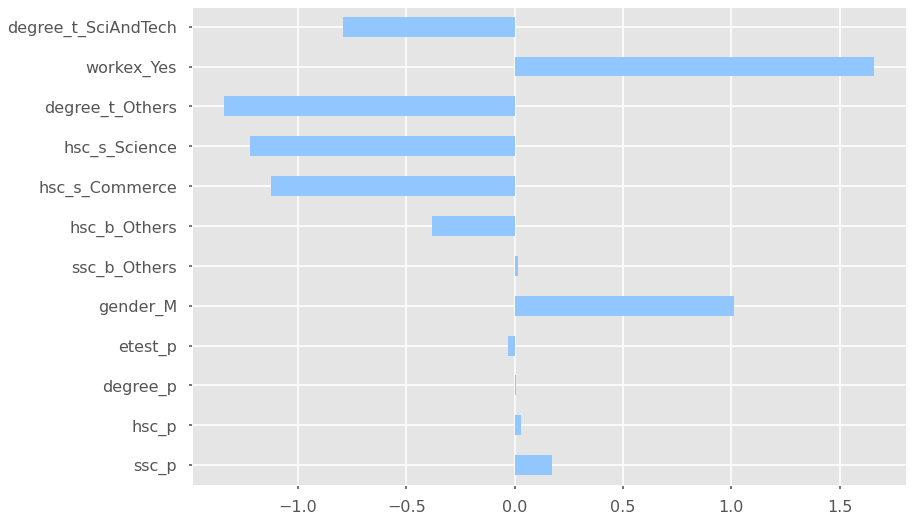

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_no_mba,Y)
feat_importances = pd.Series(model.coef_[0], index=X_no_mba.columns)
feat_importances.plot(kind='barh')
plt.show()

A candidate's gender seems to be a rather important factor in their employability. 

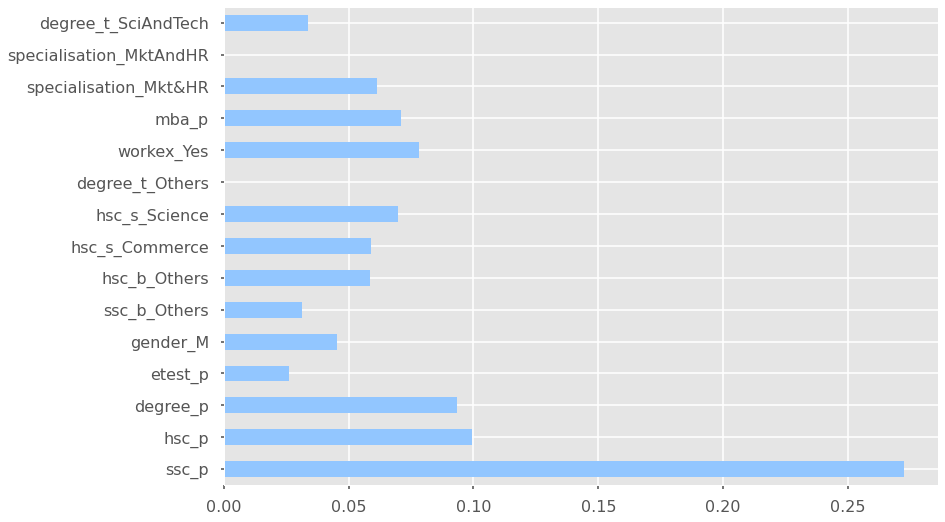

In [43]:
model1 = XGBClassifier()
model1.fit(X_mba,Y)
feat_importances = pd.Series(model1.feature_importances_, index=X_mba.columns)
feat_importances.plot(kind='barh')
plt.show()

In [44]:
X_no_mba.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'gender_M', 'ssc_b_Others',
       'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science', 'degree_t_Others',
       'workex_Yes', 'degree_t_SciAndTech'],
      dtype='object')

In [45]:
X_no_mba_new=final_dataset[['workex_Yes','ssc_b_Others','gender_M','degree_p','ssc_p']]
no_mba_model=LogisticRegression(random_state=0)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv_scores = cross_val_score(no_mba_model, X_no_mba_new, Y, cv=kf)
no_mba_model.fit(X_no_mba_train,Y_no_mba_train)
Y_pred = no_mba_model.predict(X_no_mba_test)
Y_pred_train = no_mba_model.predict(X_no_mba_train)
print("Cross Validation Scores: ",cv_scores)
print("Accuracy for no mba condition:",round(accuracy_score(Y_no_mba_test,Y_pred)*100,2),"%")
print("Train Accuracy for no mba condition:",round(accuracy_score(Y_no_mba_train,Y_pred_train)*100,2),"%")
print("\n")
matrix = confusion_matrix(Y_no_mba_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
print("\n")
report = classification_report(Y_no_mba_test,Y_pred, labels=[1,0])
print('Classification Report : \n',report)

Cross Validation Scores:  [0.77272727 1.         0.86363636 0.90909091 0.81818182 0.85714286
 0.9047619  0.80952381 0.80952381 0.80952381]
Accuracy for no mba condition: 75.38 %
Train Accuracy for no mba condition: 88.67 %


Confusion matrix : 
 [[41  5]
 [11  8]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.79      0.89      0.84        46
           0       0.62      0.42      0.50        19

    accuracy                           0.75        65
   macro avg       0.70      0.66      0.67        65
weighted avg       0.74      0.75      0.74        65



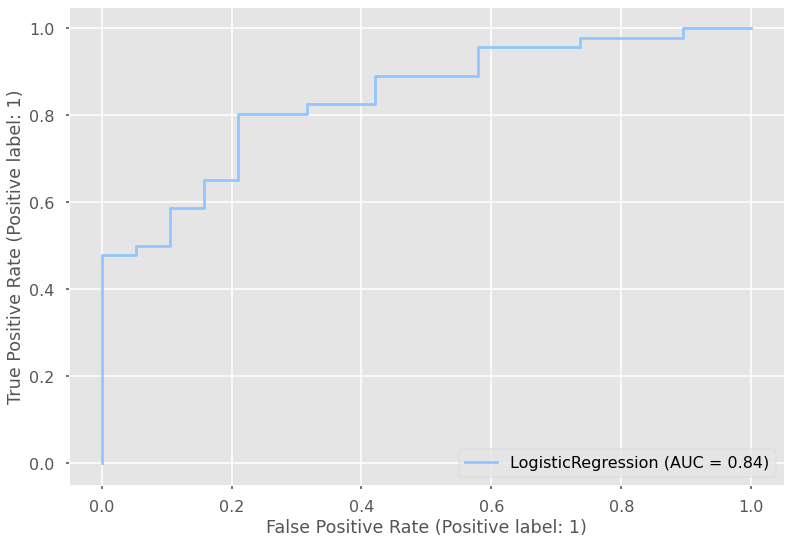

In [46]:
plot_roc_curve(no_mba_model, X_no_mba_test, Y_no_mba_test)
plt.show()

In [47]:
mba_model=XGBClassifier(random_state=0)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv_scores = cross_val_score(mba_model, X_mba, Y, cv=kf)
mba_model.fit(X_mba_train,Y_mba_train)
Y_pred = mba_model.predict(X_mba_test)
Y_pred_train = mba_model.predict(X_mba_train)
mba_model.fit(X_mba_train,Y_mba_train)
Y_pred = mba_model.predict(X_mba_test)
Y_pred_train = mba_model.predict(X_mba_train)
print("Test Accuracy for mba condition:",round(accuracy_score(Y_mba_test,Y_pred)*100,2),"%")
print("Train Accuracy for mba condition:",round(accuracy_score(Y_mba_train,Y_pred_train)*100,2),"%")
print("\n")
matrix = confusion_matrix(Y_mba_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
print("\n")
report = classification_report(Y_mba_test,Y_pred, labels=[1,0])
print('Classification Report : \n',report)

Test Accuracy for mba condition: 87.69 %
Train Accuracy for mba condition: 100.0 %


Confusion matrix : 
 [[42  3]
 [ 5 15]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.89      0.93      0.91        45
           0       0.83      0.75      0.79        20

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



### Hyperparameter Tuning

In [48]:
def tuning_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    from sklearn.model_selection import GridSearchCV
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [49]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred =  tuning_pipeline(X_mba_train, X_mba_test, Y_mba_train, Y_mba_test, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.3651483716701107
{'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.9}


In [50]:
mba_model=XGBClassifier(colsample_bytree=0.7,max_depth=15,n_estimators=400,reg_alpha=1.3,reg_lambda=1.2,subsample=0.9)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)
cv_scores = cross_val_score(mba_model, X_mba, Y, cv=kf)
mba_model.fit(X_mba_train,Y_mba_train)
Y_pred = mba_model.predict(X_mba_test)
Y_pred_train = mba_model.predict(X_mba_train)
print("Test Accuracy for mba condition:",round(accuracy_score(Y_mba_test,Y_pred)*100,2),"%")
print("Train Accuracy for mba condition:",round(accuracy_score(Y_mba_train,Y_pred_train)*100,2),"%")
print("\n")
matrix = confusion_matrix(Y_mba_test,Y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)
print("\n")
report = classification_report(Y_mba_test,Y_pred, labels=[1,0])
print('Classification Report : \n',report)

Test Accuracy for mba condition: 87.69 %
Train Accuracy for mba condition: 99.33 %


Confusion matrix : 
 [[43  2]
 [ 6 14]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.88      0.96      0.91        45
           0       0.88      0.70      0.78        20

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.88      0.88      0.87        65



In [51]:
import pickle
pickle.dump(no_mba_model,open("employability_nomba.sav", 'wb'))
pickle.dump(mba_model,open("employability_mba.sav", 'wb'))